In [ ]:
!nvidia-smi

Sun Dec 13 01:26:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/vgg_encoding_file.zip" -d "/content/drive/My Drive/"

Archive:  /content/drive/My Drive/vgg_encoding_file.zip
  inflating: /content/drive/My Drive/encoding_file.csv  


In [ ]:
# download and unpack tsnecuda from anaconda.org

!wget https://anaconda.org/CannyLab/tsnecuda/2.1.0/download/linux-64/tsnecuda-2.1.0-cuda100.tar.bz2
!tar xvjf tsnecuda-2.1.0-cuda100.tar.bz2
!cp -r site-packages/* /usr/local/lib/python3.6/dist-packages/

--2020-12-13 01:31:49--  https://anaconda.org/CannyLab/tsnecuda/2.1.0/download/linux-64/tsnecuda-2.1.0-cuda100.tar.bz2
Resolving anaconda.org (anaconda.org)... 104.17.92.24, 104.17.93.24, 2606:4700::6811:5d18, ...
Connecting to anaconda.org (anaconda.org)|104.17.92.24|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5d019c23c7424a015486440c/5d790a95778a870c42137059?response-content-disposition=attachment%3B%20filename%3D%22tsnecuda-2.1.0-cuda100.tar.bz2%22%3B%20filename%2A%3DUTF-8%27%27tsnecuda-2.1.0-cuda100.tar.bz2&response-content-type=application%2Fx-tar&X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Expires=60&X-Amz-Date=20201213T013149Z&X-Amz-SignedHeaders=host&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEBgaCXVzLWVhc3QtMSJGMEQCIHAZfHtgjWCQhFnUfl4sZaeLzEDJCYdfdPLzH6oHFvO3AiAYLnELYXVBJshBWsvz0po%2Bv6wYmVHkyuQRXksjETgSGCq9Awix%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F8BEAAaDDQ1NTg2NDA5ODM3OCIMNwa4FS5ERTE7i56NKpEDVCZmHbxn1xpVt5gXb

In [ ]:
# create a symbolic link between the downloaded libfaiss.so file and the location python's looking at

!echo $LD_LIBRARY_PATH 
# this is probably /usr/lib64-nvidia

!ln -s /content/lib/libfaiss.so $LD_LIBRARY_PATH/libfaiss.so

/usr/lib64-nvidia


In [ ]:
import tsnecuda
tsnecuda.test()

In [ ]:
from tsnecuda import TSNE as TSNE_CUDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/encoding_file.csv')

In [ ]:
df.head()

,id,image_id,encoded_0,encoded_1,encoded_2,encoded_3,encoded_4,encoded_5,encoded_6,encoded_7,encoded_8,encoded_9,encoded_10,encoded_11,encoded_12,encoded_13,encoded_14,encoded_15,encoded_16,encoded_17,encoded_18,encoded_19,encoded_20,encoded_21,encoded_22,encoded_23,encoded_24,encoded_25,encoded_26,encoded_27,encoded_28,encoded_29,encoded_30,encoded_31,encoded_32,encoded_33,encoded_34,encoded_35,encoded_36,encoded_37,...,encoded_984,encoded_985,encoded_986,encoded_987,encoded_988,encoded_989,encoded_990,encoded_991,encoded_992,encoded_993,encoded_994,encoded_995,encoded_996,encoded_997,encoded_998,encoded_999,encoded_1000,encoded_1001,encoded_1002,encoded_1003,encoded_1004,encoded_1005,encoded_1006,encoded_1007,encoded_1008,encoded_1009,encoded_1010,encoded_1011,encoded_1012,encoded_1013,encoded_1014,encoded_1015,encoded_1016,encoded_1017,encoded_1018,encoded_1019,encoded_1020,encoded_1021,encoded_1022,encoded_1023
0,000075604a,6bdca6e490.jpg,0.226382,0.280085,0.287699,0.169319,0.224267,0.188892,0.261887,0.604996,0.223392,0.142018,0.057306,0.227046,0.147885,0.152339,0.197473,0.078190,0.296206,0.266312,0.147161,0.152641,0.169203,0.230077,0.329037,0.144119,0.194665,0.133772,0.164072,0.244804,0.031989,0.252993,0.147618,0.261741,0.025768,0.224401,0.260968,0.198199,0.096409,0.348198,...,0.263316,0.291258,0.084711,0.322031,0.214421,0.105357,0.143521,0.153385,0.213603,0.170601,0.137462,0.250163,0.231360,0.141957,0.281933,0.138643,0.147383,0.333175,0.554926,0.183222,0.224128,0.281477,0.234521,0.137451,0.208037,0.202954,0.270696,0.101801,0.179057,0.165560,0.269623,0.127721,0.120851,0.355867,0.086103,0.296483,0.067127,0.220659,0.076341,0.111046
1,00007bfd16,6409eab844.jpg,0.206310,0.340562,0.095913,0.219280,0.213159,0.171148,0.274929,0.455377,0.136503,0.334035,0.225571,0.234864,0.308541,0.032040,0.203679,0.258172,0.152027,0.375173,0.224120,0.239487,0.113391,0.282094,0.204581,0.088210,0.226177,0.215655,0.163612,0.332932,0.079690,0.156847,0.248961,0.224484,0.118482,0.153101,0.291520,0.135798,0.235896,0.309376,...,0.168618,0.230939,0.262747,0.194705,0.132017,0.276856,0.076928,0.238135,0.277175,0.168177,0.155880,0.172492,0.000560,0.310237,0.233917,0.118595,0.119009,0.316409,0.330360,0.250782,0.261459,0.158153,0.176988,0.175156,0.283117,0.143574,0.158682,0.278961,0.084766,0.279611,0.103536,0.303408,0.070969,0.270932,0.170114,0.201568,0.238247,0.110069,0.093779,0.245532
2,000095fc1d,a1374cdd98.jpg,0.256926,0.355912,0.224993,0.190895,0.185534,0.267949,0.414669,0.500031,0.430830,0.093389,0.134844,0.250733,0.017917,0.271599,0.024040,0.194607,0.257637,0.245555,0.291670,0.156266,0.306949,0.174278,0.303852,0.041102,0.291063,0.218326,0.128229,0.182572,0.125137,0.261621,0.360209,0.117193,0.161612,0.246498,0.194820,0.215977,0.045397,0.253746,...,0.298049,0.080113,0.284895,0.177567,0.236844,0.140887,0.178055,0.288507,0.318793,0.255834,0.168181,0.268104,0.173571,0.138386,0.232290,0.114127,0.325087,0.031038,0.183967,0.313238,0.339283,0.177798,0.013083,0.394887,0.240726,0.119538,0.013536,0.336150,0.402374,0.047724,0.055845,0.180230,0.300623,0.074328,0.255438,0.151574,0.275468,0.186984,0.105005,0.171796
3,0000b1e2b5,cb1a684683.jpg,0.056077,0.366853,0.245182,0.147391,0.145432,0.167659,0.372726,0.478445,0.059821,0.259868,0.230837,0.332252,0.196950,0.219982,0.052309,0.292062,0.158102,0.242797,0.072373,0.329067,0.180148,0.173350,0.304023,0.082553,0.151182,0.285482,0.153575,0.222742,0.119003,0.130075,0.115509,0.210471,0.161730,0.171609,0.357536,0.211716,0.119309,0.293315,...,0.168165,0.230294,0.185485,0.227494,0.218112,0.226323,0.046998,0.261278,0.225748,0.113354,0.266903,0.118992,0.104629,0.264362,0.160449,0.114347,0.217654,0.195374,0.161285,0.473080,0.114182,0.167594,0.289424,0.197219,0.270953,0.011173,0.223173,0.284205,0.060413,0.280424,0.204621,0.190700,0.166960,0.389173,0.251589,0.101654,0.181556,0.081070,0.087356,0.219324
4,0000c79afb,2f4b4c4452.jpg,0.282934,0.154787,0.290266,0.198504,0.007084,0.288480,0.284606,0.472556,0.005073,0.283507,0.052460,0.241186

In [ ]:
tsne_cuda = TSNE_CUDA(
    n_components=2, 
    perplexity=30.0, 
    early_exaggeration=12.0, 
    learning_rate=200.0, 
    n_iter=1000, 
    n_iter_without_progress=300, 
    min_grad_norm=1e-07, 
    metric='euclidean', 
    init='random', 
    verbose=0,
    random_seed=None, # different parameter name
    theta=0.5 # different parameter name
)

In [ ]:
tsne_cuda = TSNE_CUDA(
    n_components=2, 
    perplexity=30.0, 
    n_iter=1000, 
    random_seed=0, # different parameter name
)

In [ ]:
X= df[df.columns[2:]].head(2807)
del(df)
X

,encoded_0,encoded_1,encoded_2,encoded_3,encoded_4,encoded_5,encoded_6,encoded_7,encoded_8,encoded_9,encoded_10,encoded_11,encoded_12,encoded_13,encoded_14,encoded_15,encoded_16,encoded_17,encoded_18,encoded_19,encoded_20,encoded_21,encoded_22,encoded_23,encoded_24,encoded_25,encoded_26,encoded_27,encoded_28,encoded_29,encoded_30,encoded_31,encoded_32,encoded_33,encoded_34,encoded_35,encoded_36,encoded_37,encoded_38,encoded_39,...,encoded_984,encoded_985,encoded_986,encoded_987,encoded_988,encoded_989,encoded_990,encoded_991,encoded_992,encoded_993,encoded_994,encoded_995,encoded_996,encoded_997,encoded_998,encoded_999,encoded_1000,encoded_1001,encoded_1002,encoded_1003,encoded_1004,encoded_1005,encoded_1006,encoded_1007,encoded_1008,encoded_1009,encoded_1010,encoded_1011,encoded_1012,encoded_1013,encoded_1014,encoded_1015,encoded_1016,encoded_1017,encoded_1018,encoded_1019,encoded_1020,encoded_1021,encoded_1022,encoded_1023
0,0.226382,0.280085,0.287699,0.169319,0.224267,0.188892,0.261887,0.604996,0.223392,0.142018,0.057306,0.227046,0.147885,0.152339,0.197473,0.078190,0.296206,0.266312,0.147161,0.152641,0.169203,0.230077,0.329037,0.144119,0.194665,0.133772,0.164072,0.244804,0.031989,0.252993,0.147618,0.261741,0.025768,0.224401,0.260968,0.198199,0.096409,0.348198,0.250529,0.175404,...,0.263316,0.291258,0.084711,0.322031,0.214421,0.105357,0.143521,0.153385,0.213603,0.170601,0.137462,0.250163,0.231360,0.141957,0.281933,0.138643,0.147383,0.333175,0.554926,0.183222,0.224128,0.281477,0.234521,0.137451,0.208037,0.202954,0.270696,0.101801,0.179057,0.165560,0.269623,0.127721,0.120851,0.355867,0.086103,0.296483,0.067127,0.220659,0.076341,0.111046
1,0.206310,0.340562,0.095913,0.219280,0.213159,0.171148,0.274929,0.455377,0.136503,0.334035,0.225571,0.234864,0.308541,0.032040,0.203679,0.258172,0.152027,0.375173,0.224120,0.239487,0.113391,0.282094,0.204581,0.088210,0.226177,0.215655,0.163612,0.332932,0.079690,0.156847,0.248961,0.224484,0.118482,0.153101,0.291520,0.135798,0.235896,0.309376,0.111380,0.195462,...,0.168618,0.230939,0.262747,0.194705,0.132017,0.276856,0.076928,0.238135,0.277175,0.168177,0.155880,0.172492,0.000560,0.310237,0.233917,0.118595,0.119009,0.316409,0.330360,0.250782,0.261459,0.158153,0.176988,0.175156,0.283117,0.143574,0.158682,0.278961,0.084766,0.279611,0.103536,0.303408,0.070969,0.270932,0.170114,0.201568,0.238247,0.110069,0.093779,0.245532
2,0.256926,0.355912,0.224993,0.190895,0.185534,0.267949,0.414669,0.500031,0.430830,0.093389,0.134844,0.250733,0.017917,0.271599,0.024040,0.194607,0.257637,0.245555,0.291670,0.156266,0.306949,0.174278,0.303852,0.041102,0.291063,0.218326,0.128229,0.182572,0.125137,0.261621,0.360209,0.117193,0.161612,0.246498,0.194820,0.215977,0.045397,0.253746,0.142283,0.208775,...,0.298049,0.080113,0.284895,0.177567,0.236844,0.140887,0.178055,0.288507,0.318793,0.255834,0.168181,0.268104,0.173571,0.138386,0.232290,0.114127,0.325087,0.031038,0.183967,0.313238,0.339283,0.177798,0.013083,0.394887,0.240726,0.119538,0.013536,0.336150,0.402374,0.047724,0.055845,0.180230,0.300623,0.074328,0.255438,0.151574,0.275468,0.186984,0.105005,0.171796
3,0.056077,0.366853,0.245182,0.147391,0.145432,0.167659,0.372726,0.478445,0.059821,0.259868,0.230837,0.332252,0.196950,0.219982,0.052309,0.292062,0.158102,0.242797,0.072373,0.329067,0.180148,0.173350,0.304023,0.082553,0.151182,0.285482,0.153575,0.222742,0.119003,0.130075,0.115509,0.210471,0.161730,0.171609,0.357536,0.211716,0.119309,0.293315,0.212086,0.095120,...,0.168165,0.230294,0.185485,0.227494,0.218112,0.226323,0.046998,0.261278,0.225748,0.113354,0.266903,0.118992,0.104629,0.264362,0.160449,0.114347,0.217654,0.195374,0.161285,0.473080,0.114182,0.167594,0.289424,0.197219,0.270953,0.011173,0.223173,0.284205,0.060413,0.280424,0.204621,0.190700,0.166960,0.389173,0.251589,0.101654,0.181556,0.081070,0.087356,0.219324
4,0.282934,0.154787,0.290266,0.198504,0.007084,0.288480,0.284606,0.472556,0.005073,0.283507,0.052460,0.241186,0.083603,0.243414,0.065800,0.180424,0.196421,0.

In [ ]:
# X= df[df.columns[2:]]
# del(df)
# X

In [ ]:
embeddings_gpu = tsne_cuda.fit_transform(X)

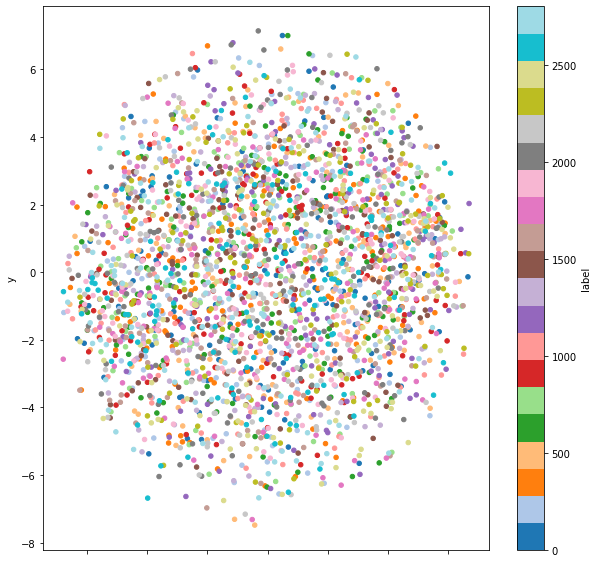

In [ ]:
pd.DataFrame(
    embeddings_gpu
).rename(
    columns={0:'x',1:'y'}
).assign(
    label=X.index
).plot.scatter(x='x',y='y',c='label',cmap='tab20',figsize=(10,10)).get_figure().savefig('/content/drive/My Drive/vggsample.png',dpi = 80)